In [66]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec 
import numpy as np
import seaborn as sns

In [67]:
data=pd.read_csv('../App/Data/kc_house_data.csv')

In [68]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [69]:
data['date'] = pd.to_datetime(data['date'], format ='%Y-%m-%d')
data['yr_built'] = pd.to_datetime(data['yr_built'], format = '%Y').dt.year
data.loc[data['yr_renovated']!= 0, 'yr_renovated' ] = pd.to_datetime(data.loc[data['yr_renovated']!= 0, 'yr_renovated' ], format = '%Y').dt.year

In [70]:
data.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

In [71]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [72]:
data.shape[0]

21613

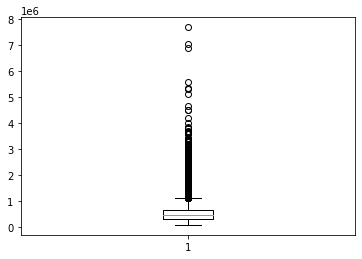

In [73]:
Cvp=plt.boxplot(data['price'])

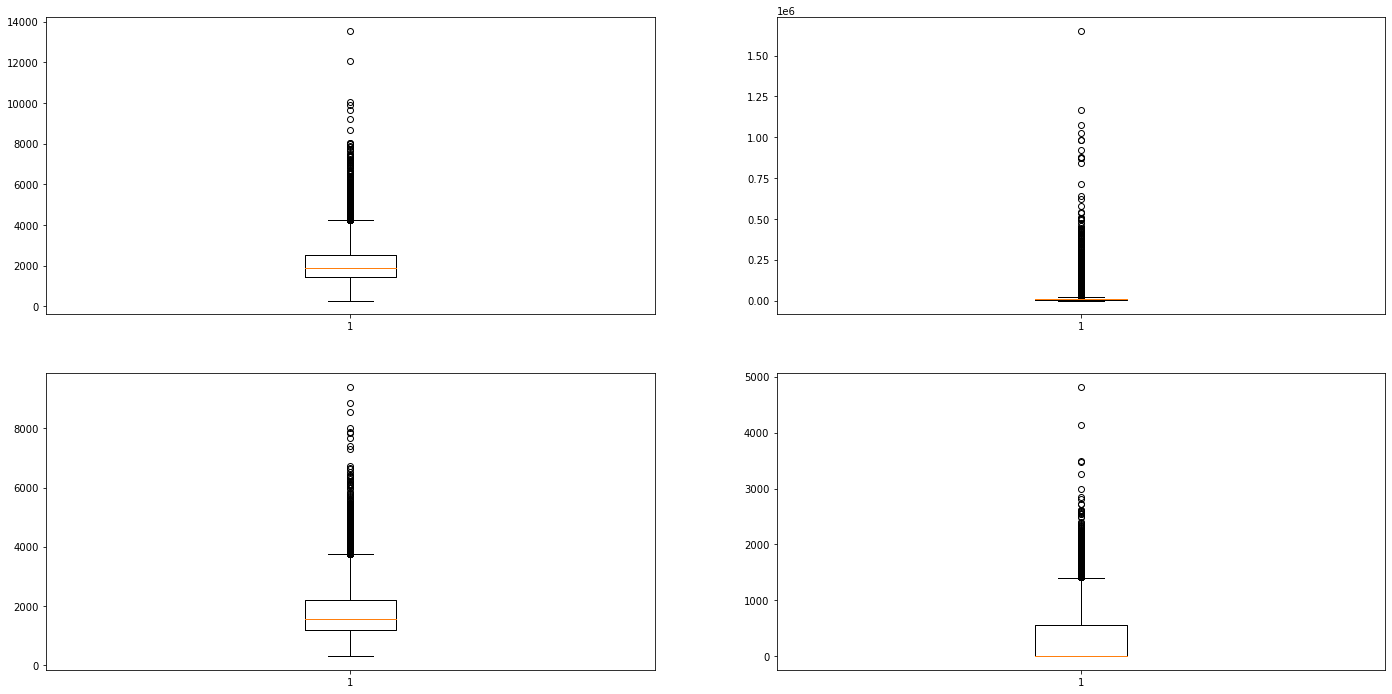

In [74]:
fig = plt.figure(figsize = (24,12))
gs = gridspec.GridSpec(2, 2, figure = fig)

ax1 = fig.add_subplot(gs[0,0])
ax1 = plt.boxplot(data['sqft_living'])
ax2 = fig.add_subplot(gs[0,1])
ax2 = plt.boxplot(data['sqft_lot'])
ax3 = fig.add_subplot(gs[1,0])
ax3 = plt.boxplot(data['sqft_above'])
ax4 = fig.add_subplot(gs[1,1])
ax4 = plt.boxplot(data['sqft_basement'])

# limitacion de la base de datos

#### Se limito con la ayuda de los cuartiles:

RI=Q3-Q1

Error permitido:

Q1-1.5 x RI

Q3-1.5 x RI

Se consideraron las siguientes columnas como las de mayor influencia en la base de datos por su nivel de variacion, por lo que se decidio limitarlas

In [75]:
v1=np.percentile(data['price'], 75)+1.5*(np.percentile(data['price'], 75)-np.percentile(data['price'], 25))
v2=np.percentile(data['sqft_living'], 75)+1.5*(np.percentile(data['sqft_living'], 75)-np.percentile(data['sqft_living'], 25))
v3=np.percentile(data['sqft_lot'], 75)+1.5*(np.percentile(data['sqft_lot'], 75)-np.percentile(data['sqft_lot'], 25))
v4=np.percentile(data['sqft_above'], 75)+1.5*(np.percentile(data['sqft_above'], 75)-np.percentile(data['sqft_above'], 25))
v5=np.percentile(data['sqft_basement'], 75)+1.5*(np.percentile(data['sqft_basement'], 75)-np.percentile(data['sqft_basement'], 25))

In [76]:
## (data['price']<v1)&

Se limito la base de datos sin tocar la variable precio

In [77]:
data = data[(data['bedrooms']<15)&
            (data['bathrooms']<7)&
            (data['sqft_living']<v2)&
            (data['sqft_lot']<v3)&
            (data['sqft_above']<v4)&
            (data['sqft_basement']<v5)
             ]

In [78]:
data.shape[0]

18434

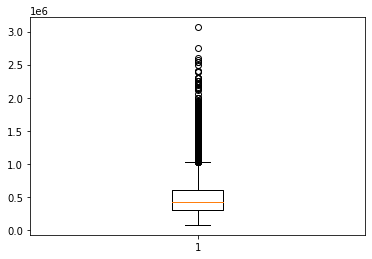

In [79]:
Cvp1=plt.boxplot(data['price'])

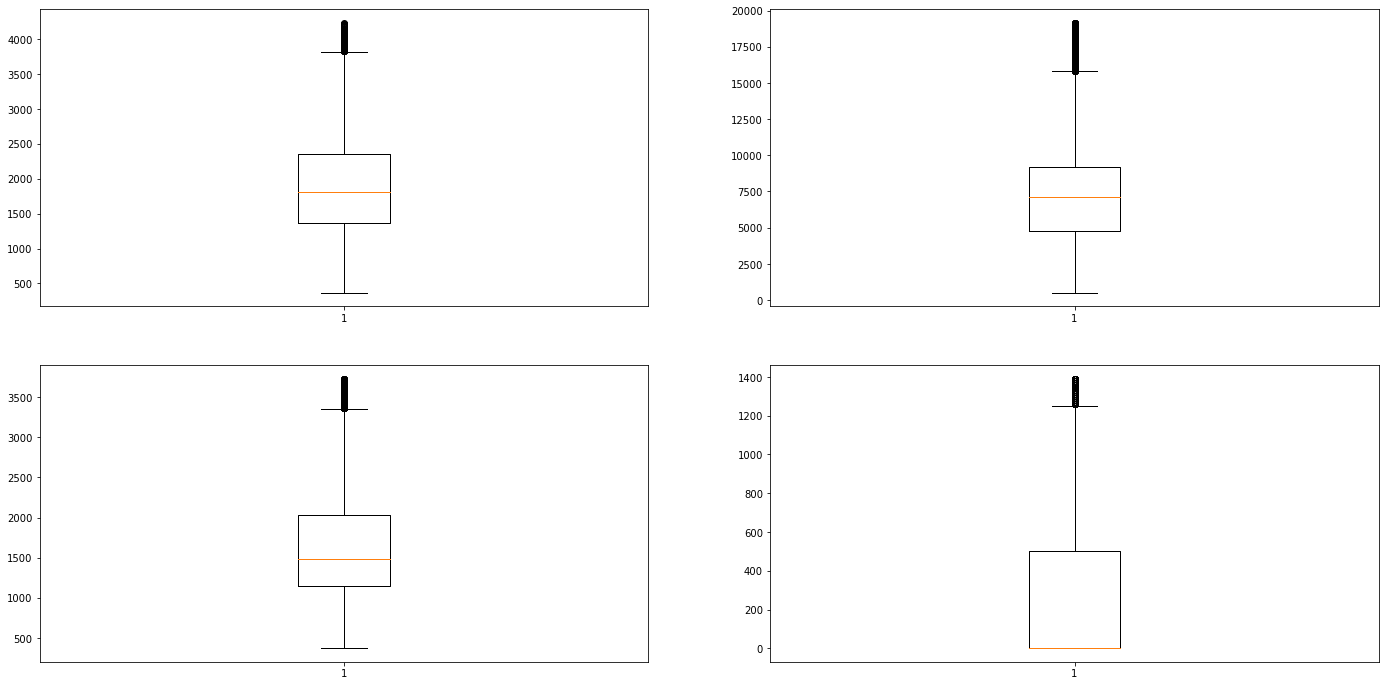

In [82]:
fig1 = plt.figure(figsize = (24,12))
gs1 = gridspec.GridSpec(2, 2, figure = fig1)

ax4 = fig1.add_subplot(gs1[0,0])
ax4 = plt.boxplot(data['sqft_living'])
ax5 = fig1.add_subplot(gs1[0,1])
ax5 = plt.boxplot(data['sqft_lot'])
ax6 = fig1.add_subplot(gs1[1,0])
ax6 = plt.boxplot(data['sqft_above'])
ax7 = fig1.add_subplot(gs1[1,1])
ax7 = plt.boxplot(data['sqft_basement'])

#### La base de datos paso de tener Originalmente 21613 elementos a 18434

C:\Users\WILLIAM\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\WILLIAM\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


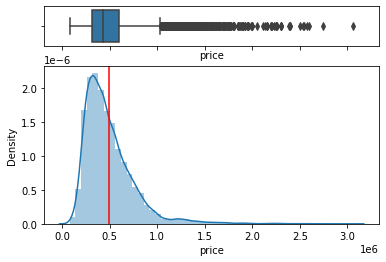

In [84]:
f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(data['price'], ax=ax[0])
sns.distplot(data['price'], ax=ax[1])
ax[1].axvline(np.mean(data['price']), color='red')